<a href="https://colab.research.google.com/github/vi-sha-kha/Data_Analysis_Using_Python-_And_SQL/blob/main/Basic_Statistical_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [39]:
import statistics

In [40]:
#mean,median,mode
df=sns.load_dataset('tips')

In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
np.mean(df['total_bill'])

19.78594262295082

In [43]:
np.median(df['total_bill'])

17.795

In [ ]:
statistics.mode(df['total_bill'])

13.42

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: ylabel='total_bill'>

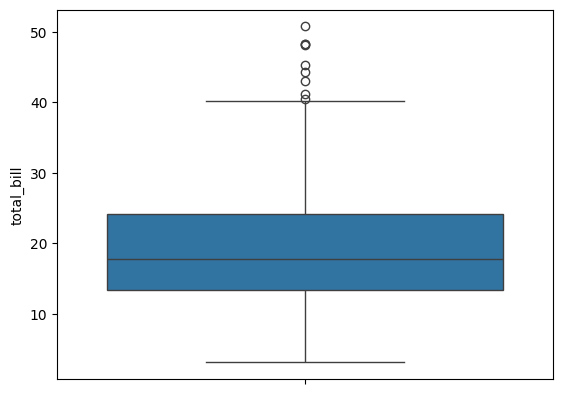

In [ ]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

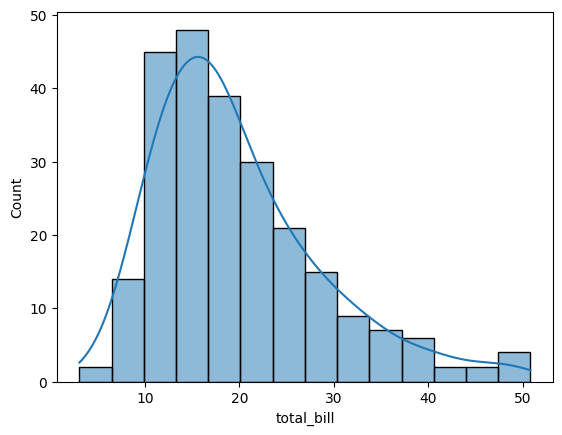

In [ ]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
df1=sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

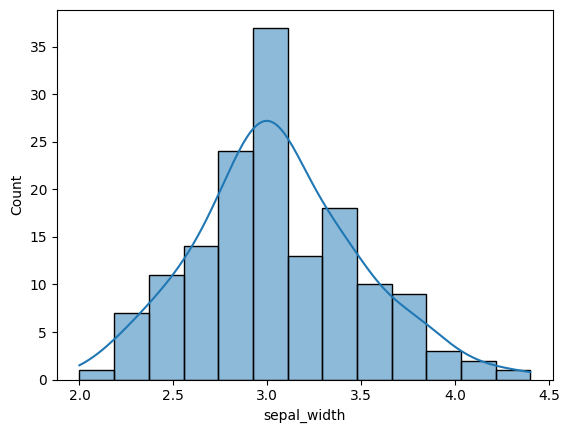

In [ ]:
sns.histplot(df1['sepal_width'], kde=True)

<Axes: xlabel='count', ylabel='species'>

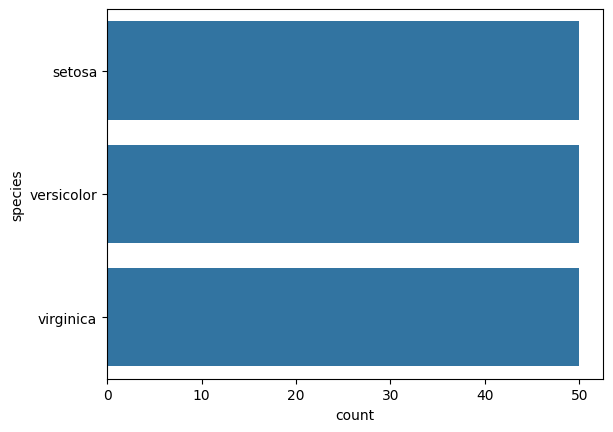

In [ ]:
sns.countplot(df1['species'])

In [ ]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

#Outliers

In [ ]:
## Define our dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [ ]:
#Z_score comparison
outliers=[]

def detect_outliers(data):
  threshold=3   ## 3rd std deviation
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers


In [ ]:
detect_outliers(dataset)

[102, 107, 108]

## IQR
1.Sort the dataset
2.Calculate Q1 and Q3
3. IQR=Q3-Q1
4.Find the lower fence(q1-1.5*IQR)
5. find the upper fence(q3+1.5*IQR)

In [ ]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [ ]:
q1,q3=np.percentile(dataset,[25,75])

In [ ]:
print(q1,q3)

12.0 15.0


In [ ]:
iqr=q3-q1
print(iqr)

3.0


In [ ]:
##Find the lower fence and higher fence
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)

In [ ]:
print(lower_fence, upper_fence)

7.5 19.5


<Axes: >

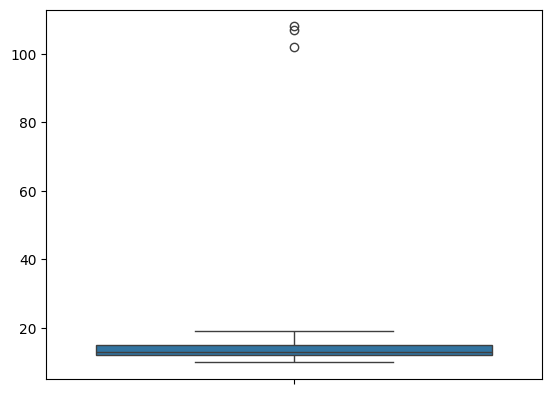

In [ ]:
sns.boxplot(dataset)

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels. The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels:

In [5]:

from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data=[88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

ztest(data,value=100)

(1.5976240527147705, 0.1101266701438426)

In [6]:
## t-test

ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [9]:
ages_mean=np.mean(ages)
ages_mean

30.34375

In [10]:
sample_size=10
age_sample=np.random.choice(ages, sample_size)

In [11]:
age_sample

array([65, 30, 35, 55, 30, 35, 55, 43, 43, 35])

In [14]:
np.mean(age_sample)

42.6

In [12]:
from scipy.stats import ttest_1samp

In [15]:
ttest_1samp(age_sample,43)

TtestResult(statistic=-0.10523077421210739, pvalue=0.9185006714488798, df=9)

# Consider another example
#ages of the college students(population)
#1 class student mean of all the ages

In [17]:
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [18]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [19]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [20]:
classA_ages.mean()

46.9

In [21]:
ttest_1samp(classA_ages, school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [22]:
school_ages.mean()

53.303333333333335

In [23]:
_,p_value=ttest_1samp(classA_ages, popmean=school_ages.mean())

In [37]:
if p_value<=0.05:
  print("Reject H0 ")
else:
    print("Accept H0")

Reject H0 


In [26]:
import seaborn as sns

In [29]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df=df.drop('species', axis=1)

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
5,5.4,3.9,1.7,0.4


In [35]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109964,0.870866,0.816524
sepal_width,-0.109964,1.000000,-0.421957,-0.359063
petal_length,0.870866,-0.421957,1.000000,0.962423
petal_width,0.816524,-0.359063,0.962423,1.000000


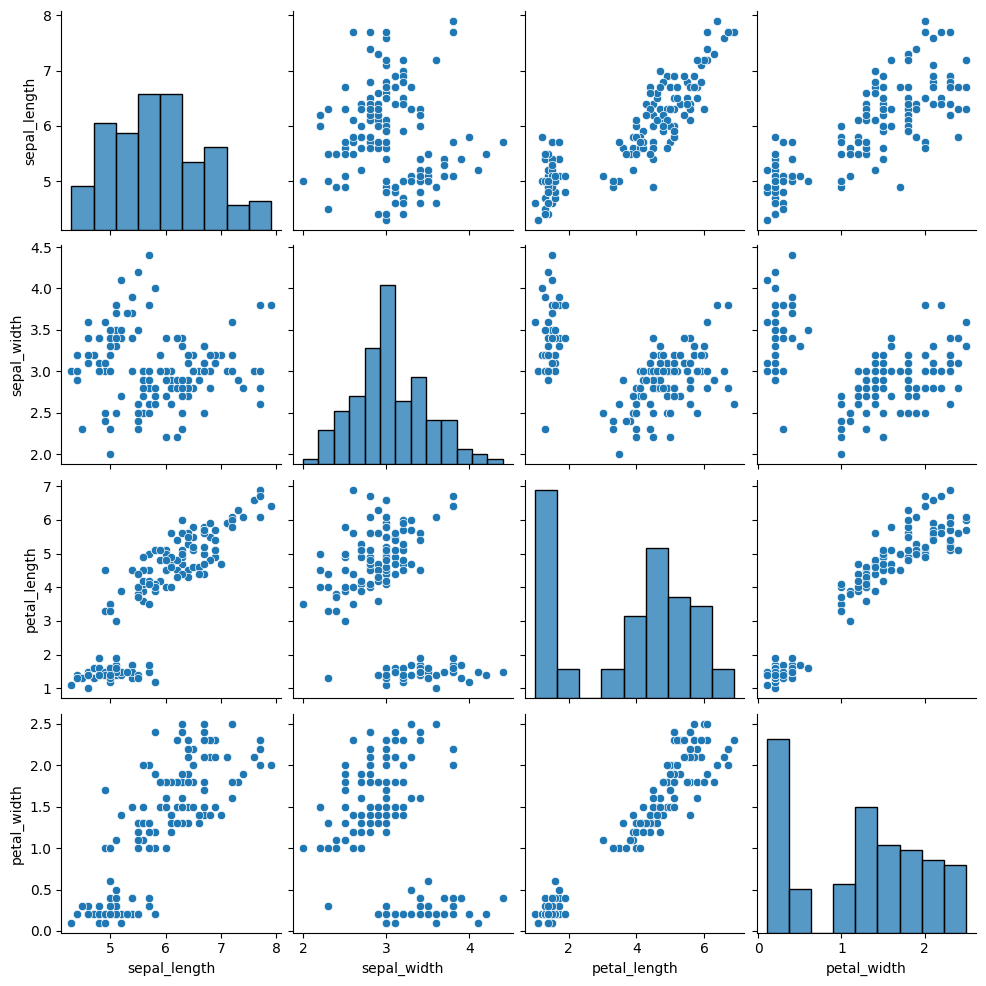

In [36]:
sns.pairplot(df)